#Importing dependencies and creating dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [9]:
x, y = make_moons(100, noise = 0.2, random_state = 42)

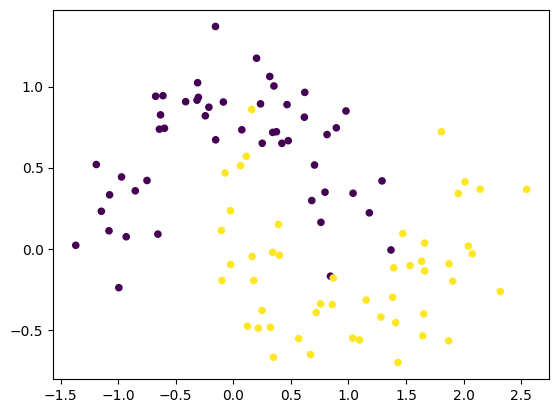

In [10]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 20)

#Model

In [11]:
m = Sequential()

m.add(Dense(units = 128, activation = 'relu', input_dim = 2))
m.add(Dense(units = 128, activation = 'relu'))
m.add(Dense(units = 1, activation = 'sigmoid'))

m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = m.fit(x, y, epochs = 2000, validation_split = 0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.4914 - loss: 0.7001 - val_accuracy: 0.6500 - val_loss: 0.6554
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6898 - loss: 0.6535 - val_accuracy: 0.7500 - val_loss: 0.6211
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8305 - loss: 0.6087 - val_accuracy: 0.8000 - val_loss: 0.5895
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8500 - loss: 0.5589 - val_accuracy: 0.8000 - val_loss: 0.5605
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8539 - loss: 0.5184 - val_accuracy: 0.8000 - val_loss: 0.5337
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8547 - loss: 0.4887 - val_accuracy: 0.8000 - val_loss: 0.5090
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8516 - loss: 0.4646 - val_accuracy: 0.8000 - val_loss: 0.4865
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8711 - loss: 0.4254 - val_accuracy: 0.8000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


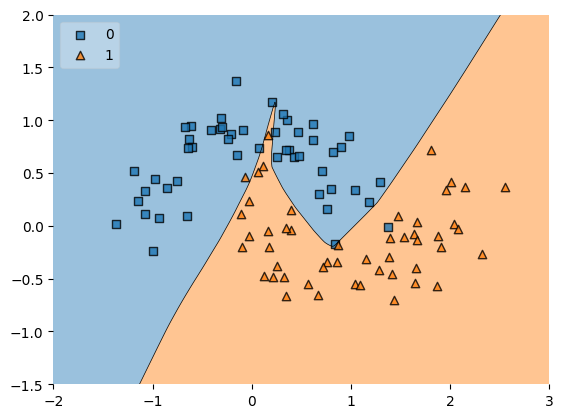

In [18]:
plot_decision_regions(x, y, clf = m, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

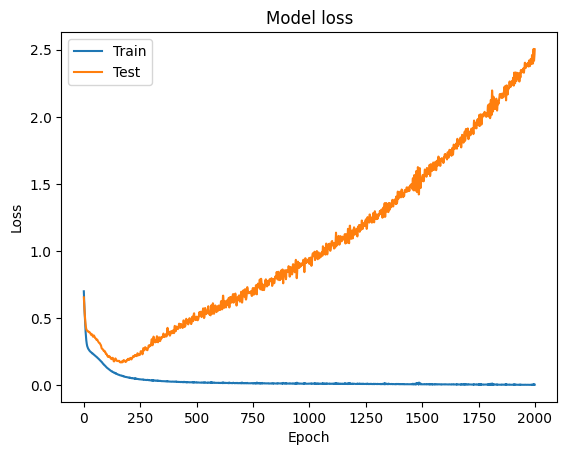

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

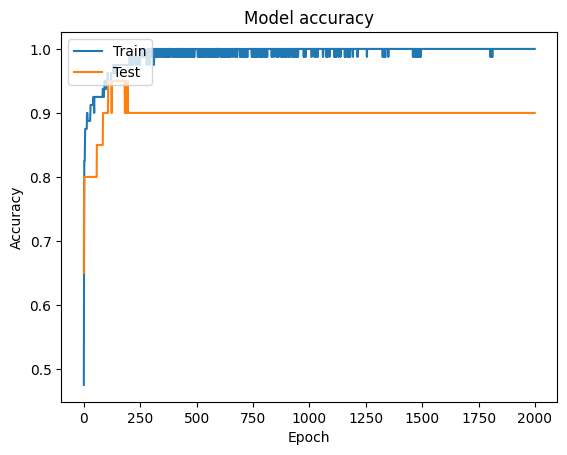

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Regularization

In [21]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

In [23]:
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history2 = model2.fit(x, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


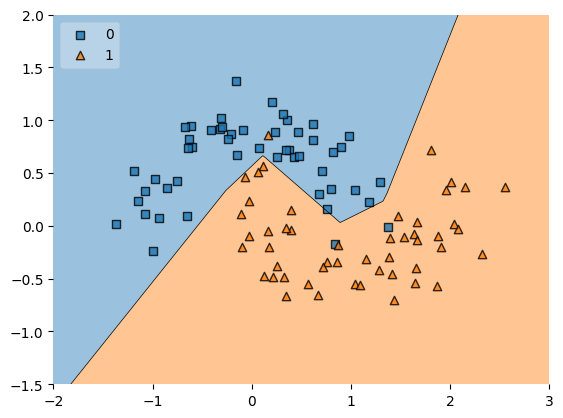

In [24]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

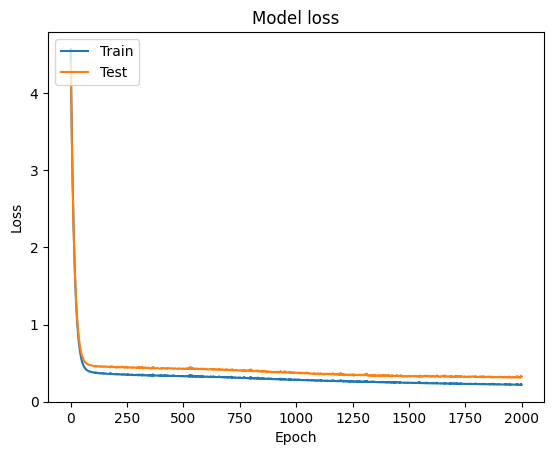

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

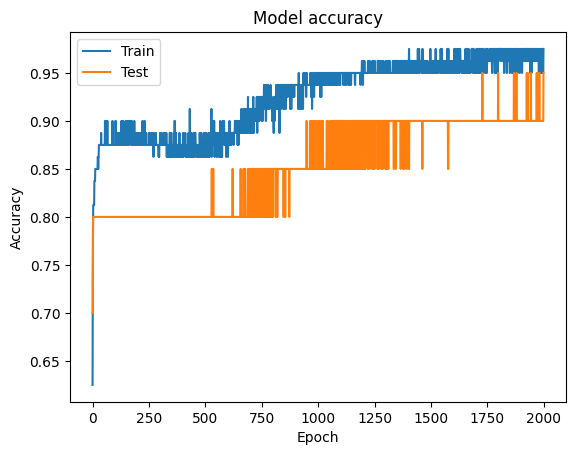

In [26]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
model1_weight_layer1 = m.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

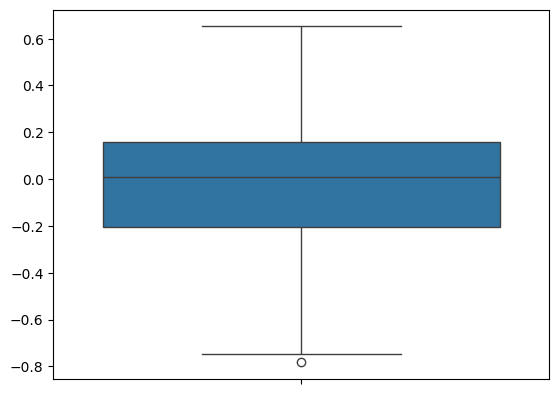

In [28]:
sns.boxplot(model1_weight_layer1)

<Axes: >

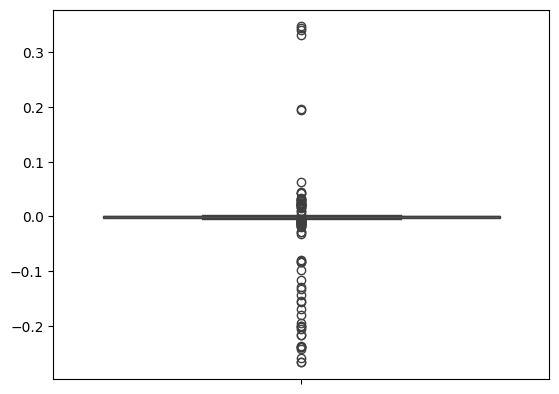

In [29]:
sns.boxplot(model2_weight_layer1)

<ipython-input-30-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-30-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

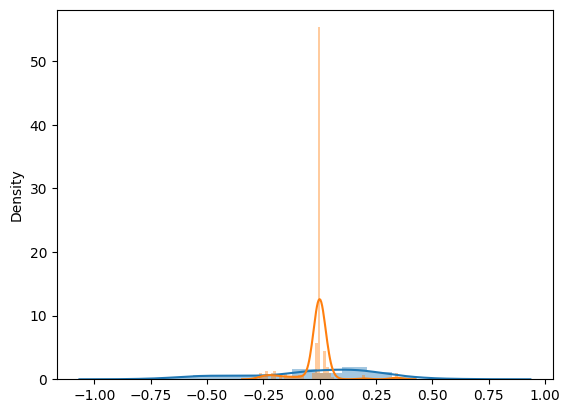

In [30]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)